In [1]:
from datetime import datetime
import itertools
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
plt.style.use('fivethirtyeight')

In [2]:
from iexfinance.stocks import get_historical_data
def get_iex_data(stock_list, start=datetime(2015,1,1), end=datetime(2019,12,31)):
    return_list = []
    for i in stock_list:
        df = pd.DataFrame(get_historical_data(i, start, end, output_format='pandas', token='pk_d28c0190de7a4d6da30b3bd2b08487c8'))
        df['ticker'] = i
        return_list.append(df)
    return return_list

## Import Data

In [3]:
hun_etfs = ['XLK']
data = get_iex_data(hun_etfs)
data

[             open   high    low  close    volume ticker
 date                                                   
 2015-01-15  40.68  40.78  39.96  39.99   9327741    XLK
 2015-01-16  39.86  40.42  39.84  40.38  18821471    XLK
 2015-01-20  40.62  40.81  40.21  40.72  12015828    XLK
 2015-01-21  40.54  40.96  40.34  40.79  13919088    XLK
 2015-01-22  40.90  41.49  40.56  41.46   8812196    XLK
 ...           ...    ...    ...    ...       ...    ...
 2019-12-24  91.37  91.37  91.03  91.24   2445364    XLK
 2019-12-26  91.43  91.94  91.37  91.92   4134648    XLK
 2019-12-27  92.29  92.29  91.68  91.91   9666200    XLK
 2019-12-30  91.89  91.90  90.68  91.38   8245638    XLK
 2019-12-31  91.07  91.77  90.95  91.67   5801615    XLK
 
 [1249 rows x 6 columns]]

In [4]:
xlk = data[0]
xlk.to_csv('xlk.csv', encoding='utf-8')

In [5]:
def clean_data(data):
    for i in range(len(data)):
        data[i] = data[i].reset_index()
        data[i]['date'] = pd.to_datetime(data[i]['date'])
        data[i] = data[i].set_index('date')
    return data

In [6]:
data = clean_data(data)

In [7]:
data

[             open   high    low  close    volume ticker
 date                                                   
 2015-01-15  40.68  40.78  39.96  39.99   9327741    XLK
 2015-01-16  39.86  40.42  39.84  40.38  18821471    XLK
 2015-01-20  40.62  40.81  40.21  40.72  12015828    XLK
 2015-01-21  40.54  40.96  40.34  40.79  13919088    XLK
 2015-01-22  40.90  41.49  40.56  41.46   8812196    XLK
 ...           ...    ...    ...    ...       ...    ...
 2019-12-24  91.37  91.37  91.03  91.24   2445364    XLK
 2019-12-26  91.43  91.94  91.37  91.92   4134648    XLK
 2019-12-27  92.29  92.29  91.68  91.91   9666200    XLK
 2019-12-30  91.89  91.90  90.68  91.38   8245638    XLK
 2019-12-31  91.07  91.77  90.95  91.67   5801615    XLK
 
 [1249 rows x 6 columns]]

In [8]:
ts = data[0]['close']

## ARIMA analysis

In [9]:
# p = d = q = range(0,3)
# pdq = list(itertools.product(p,d,q))
# pdqs = [(x[0], x[1], x[2], 5) for x in list(itertools.product(p, d, q))]
# ans = []
# for comb in pdq:
#     for combs in pdqs:
#         try:
#             mod = sm.tsa.statespace.SARIMAX(ts,
#                                             order=comb,
#                                             seasonal_order=combs,
#                                             enforce_stationarity=False,
#                                             enforce_invertibility=False)

#             output = mod.fit()
#             ans.append([comb, combs, output.aic])
#             print('ARIMA {} x {} : AIC Calculated ={}'.format(comb, combs, output.aic))
#         except:
#             continue    

In [10]:
# ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
# ans_df.loc[ans_df['aic'].idxmin()]

In [11]:
ARIMA_model = sm.tsa.statespace.SARIMAX(ts,
                                order=(2, 2, 2),
                                seasonal_order=(0, 0, 2, 5),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
output = ARIMA_model.fit()
print(output.summary().tables[1])


C:\Users\jayar\anaconda\Anaconda3\envs\PandaSpace\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9384      0.048    -19.368      0.000      -1.033      -0.843
ar.L2         -0.1083      0.018     -5.884      0.000      -0.144      -0.072
ma.L1          0.1245      0.058      2.153      0.031       0.011       0.238
ma.L2         -1.1257      0.060    -18.723      0.000      -1.244      -1.008
ma.S.L5       -0.0739      0.021     -3.487      0.000      -0.115      -0.032
ma.S.L10       0.0158      0.019      0.815      0.415      -0.022       0.054
sigma2         0.3496      0.036      9.771      0.000       0.279       0.420


In [12]:
csv_output = output.summary().tables[1]

summary_df = pd.DataFrame(csv_output, index=None)
# csv_output.to_csv('spy_summary.csv', encoding='utf-8')
# csv_output
summary_df.columns = summary_df.iloc[0]
summary_df = summary_df[1:]

summary_df.to_csv('xlk_summary.csv', encoding='utf-8')
summary_df


,,coef,std err,z,P>|z|,[0.025,0.975]
1,ar.L1,-0.9384,0.048,-19.368,0.000,-1.033,-0.843
2,ar.L2,-0.1083,0.018,-5.884,0.000,-0.144,-0.072
3,ma.L1,0.1245,0.058,2.153,0.031,0.011,0.238
4,ma.L2,-1.1257,0.060,-18.723,0.000,-1.244,-1.008
5,ma.S.L5,-0.0739,0.021,-3.487,0.000,-0.115,-0.032
6,ma.S.L10,0.0158,0.019,0.815,0.415,-0.022,0.054
7,sigma2,0.3496,0.036,9.771,0.000,0.279,0.420


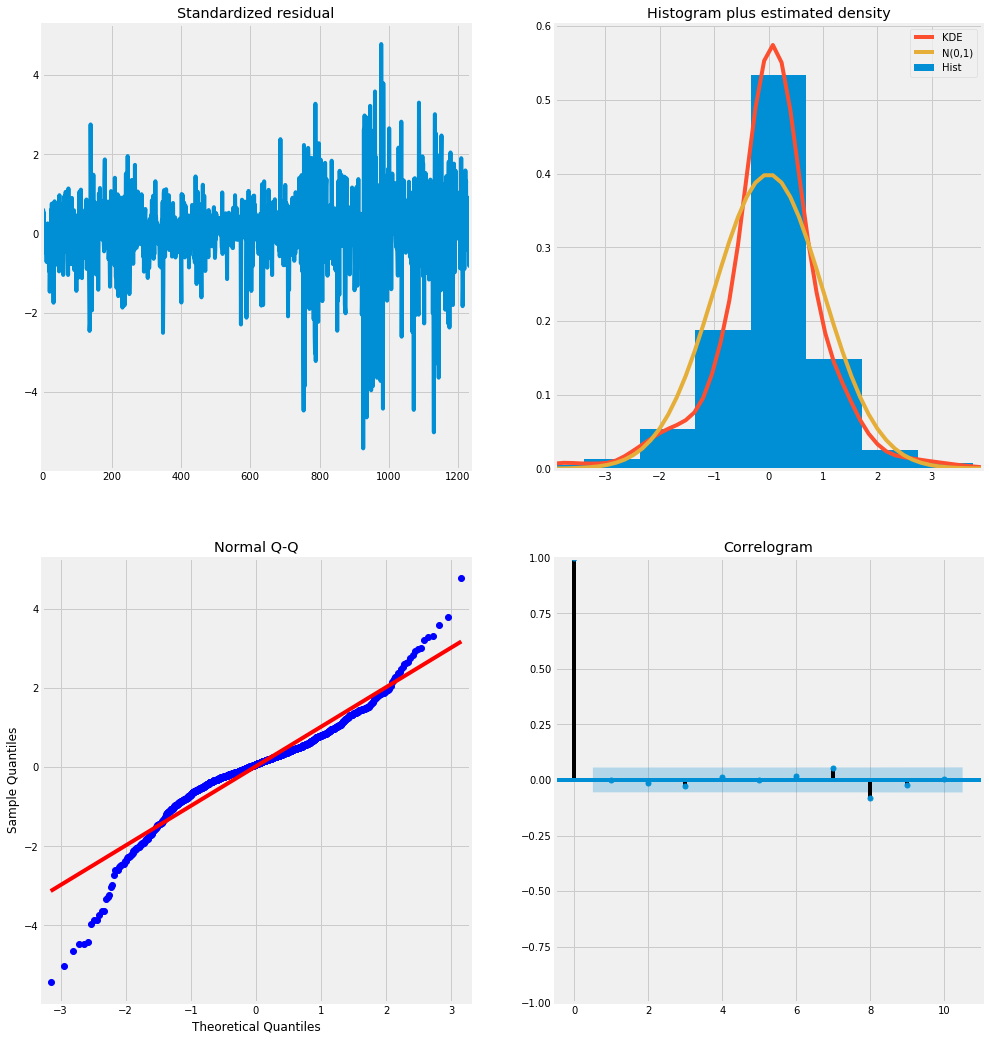

In [13]:
output.plot_diagnostics(figsize=(15, 18))
plt.savefig('xlkoutput.png')
plt.show()

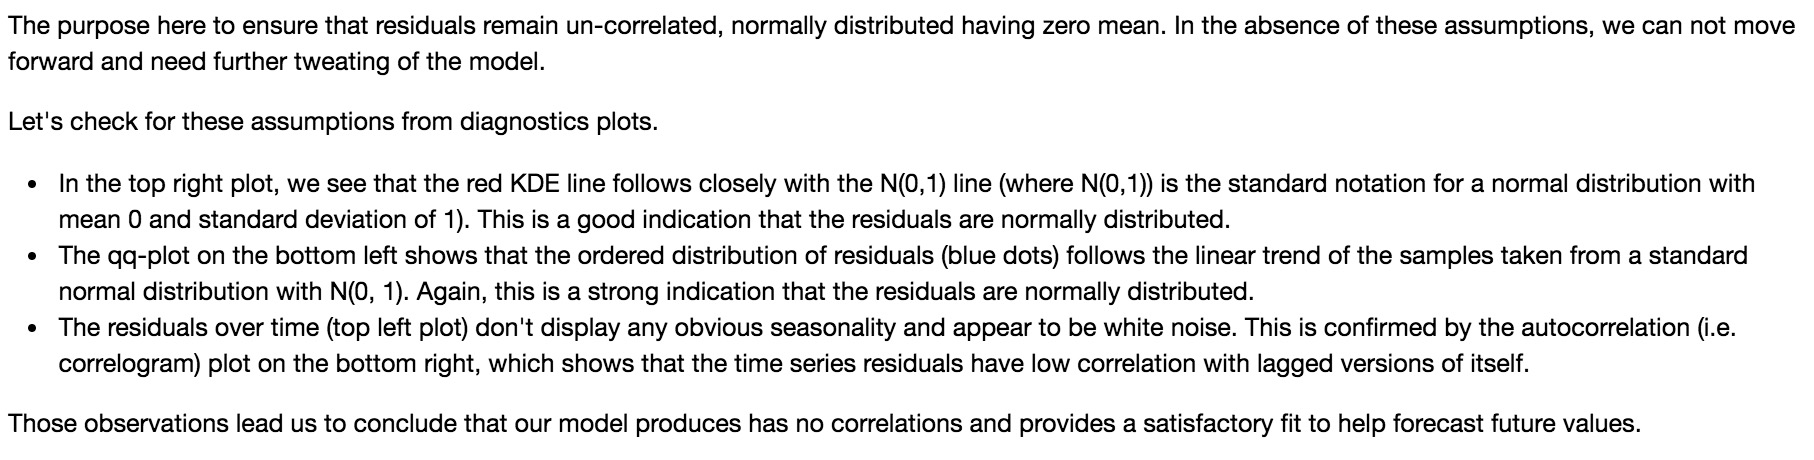

In [31]:
# plt.savefig('arima1.png')

<Figure size 432x288 with 0 Axes>

In [14]:
pred = output.get_prediction(start=pd.to_datetime('2019-11-01'), dynamic=False)
pred_conf = pred.conf_int()

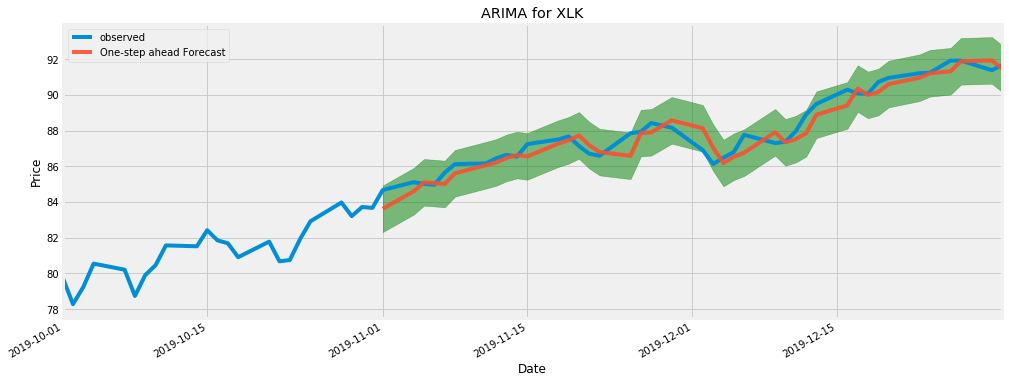

In [15]:
rcParams['figure.figsize'] = 15, 6

#Plot observed values
ax = ts['2019-10':].plot(label='observed')

#Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.9)

#Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=.5)

#Set axes labels
plt.title('ARIMA for XLK')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()

plt.savefig('xlk_arima.png')
plt.show()

In [16]:
price_forecasted = pred.predicted_mean
price_truth = ts['2019-11-01':]

# Compute the mean square error
mse = ((price_forecasted - price_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.32


In [17]:
pred_dynamic = output.get_prediction(start=pd.to_datetime('2019-11-01'), dynamic=True, full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()

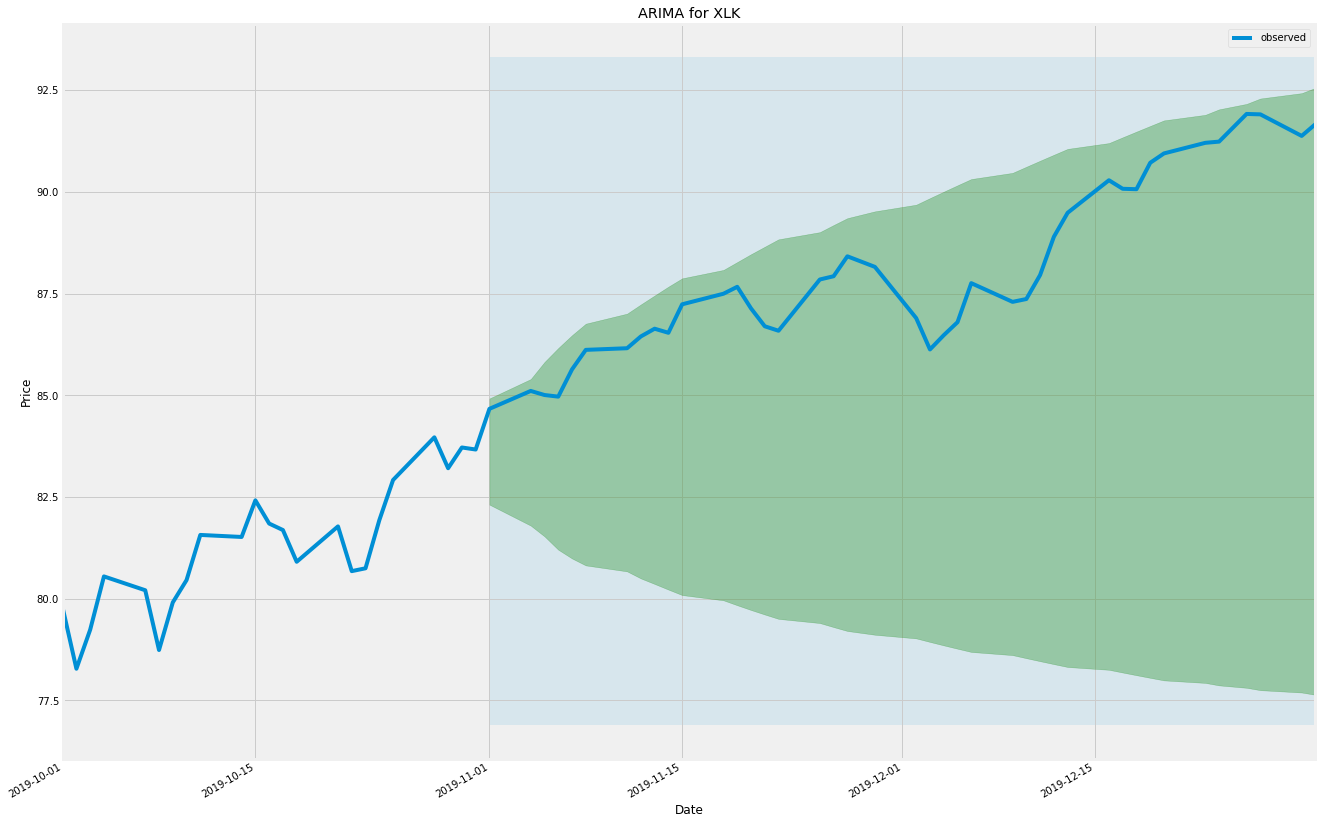

In [18]:
ax = ts['2019-10':].plot(label='observed', figsize=(20, 15))
# datum.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2019-11-01'), price_forecasted.index[-1], alpha=.1, zorder=-1)

plt.title('ARIMA for XLK')
ax.set_xlabel('Date')
ax.set_ylabel('Price')

plt.legend()
plt.savefig('xlk_arima2.png')
plt.show()

In [19]:
price_forecasted = pred_dynamic.predicted_mean
price_truth = ts['2019-11-01':]

# Compute the mean square error
mse = ((price_forecasted - price_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 16.37


In [20]:
prediction = output.get_forecast(steps=50)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

C:\Users\jayar\anaconda\Anaconda3\envs\PandaSpace\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


## FBProphet for Future

In [21]:
from fbprophet import Prophet as proph
spy = pd.DataFrame(data[0]['close']).reset_index()
spy.columns = ['ds', 'y']

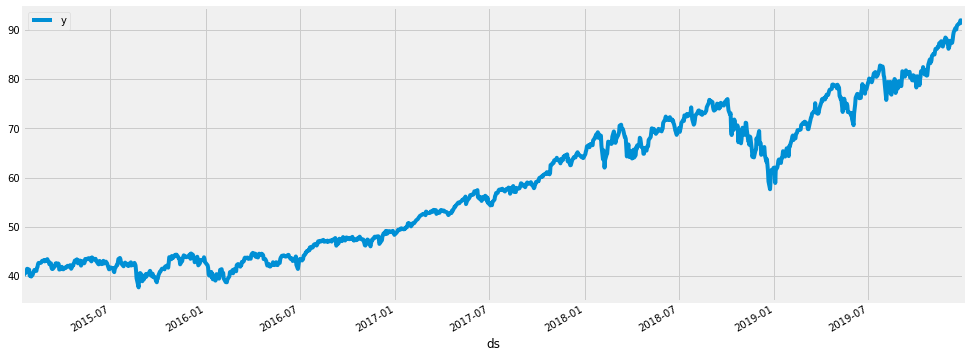

In [22]:
spy.set_index('ds').plot()

In [23]:
p = proph(interval_width=.95)
p.fit(spy)
inp = p.make_future_dataframe(periods=30, freq='D')
out = p.predict(inp)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\jayar\anaconda\Anaconda3\envs\PandaSpace\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [24]:
df = out[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

In [25]:
xlk_df_novjan = df.tail(71)
xlk_df_novjan.dtypes

ds            datetime64[ns]
yhat                 float64
yhat_lower           float64
yhat_upper           float64
dtype: object

In [46]:
# def get_iex_data(stock_list, start=datetime(2019,11,1), end=datetime(2020,1,10)):
#     return_list = []
#     for i in stock_list:
#         df = pd.DataFrame(get_historical_data(i, start, end, output_format='pandas', token='pk_d28c0190de7a4d6da30b3bd2b08487c8'))
#         df['ticker'] = i
#         return_list.append(df)
#     return return_list
# etf = ['VV']
# data = get_iex_data(etf)
# pull = data[0]['close']
# pull_df = pd.DataFrame(pull)

In [49]:
# pull_df

In [26]:
xlk_yf = pd.read_csv('XLK_yf.csv')
xlk_yf = xlk_yf.rename(columns={"Date": "ds"})
xlk_yf['ds'] = pd.to_datetime(xlk_yf['ds'])

xlk_yf.dtypes

ds           datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [27]:
xlk_yf1 = xlk_yf[['ds','Adj Close']]
xlk_yf1

,ds,Adj Close
0,2019-11-01,84.394669
1,2019-11-04,84.833244
2,2019-11-05,84.733566
3,2019-11-06,84.693695
4,2019-11-07,85.361519
5,2019-11-08,85.839958
6,2019-11-11,85.879829
7,2019-11-12,86.168877
8,2019-11-13,86.358261
9,2019-11-14,86.258591


In [28]:
comb = xlk_df_novjan.join(xlk_yf1.set_index('ds'), on='ds')
# comb = comb.set_index('ds')
comb['difference'] = comb['Adj Close'] - comb['yhat']
comb['difference_pct'] = comb['difference']/comb['Adj Close']
comb['difference_pct'] = comb['difference_pct'].map("{:.2%}".format)
comb.to_csv('vv_predict_fbprophet.csv', encoding='utf-8')
comb = comb.drop([1249])
comb = comb.drop([1252])
comb = comb.drop([1253])
comb = comb.drop([1259])
comb = comb.drop([1260])
comb = comb.drop([1266])
comb = comb.drop([1267])
comb = comb.drop([1268])
comb = comb.drop([1273])
comb = comb.drop([1274])
comb.tail(50)

,ds,yhat,yhat_lower,yhat_upper,Adj Close,difference,difference_pct
1219,2019-11-18,86.467663,83.689680,89.372347,87.215469,0.747806,0.86%
1220,2019-11-19,86.555355,83.545545,89.255273,87.384911,0.829556,0.95%
1221,2019-11-20,86.595869,83.720395,89.485396,86.856636,0.260767,0.30%
1222,2019-11-21,86.657970,83.918342,89.524435,86.418068,-0.239902,-0.28%
1223,2019-11-22,86.672645,83.761265,89.613972,86.308426,-0.364219,-0.42%
1224,2019-11-25,86.777947,83.950047,89.420565,87.564331,0.786384,0.90%
1225,2019-11-26,86.890540,83.962113,89.568588,87.644073,0.753533,0.86%
1226,2019-11-27,86.960567,84.173589,89.689345,88.132477,1.171910,1.33%
1227,2019-11-29,87.105795,84.250051,89.875827,87.873329,0.767534,0.87%
1228,2019-12-02,87.318942,84.660057,90.312042,86.617424,-0.701518,-0.81%


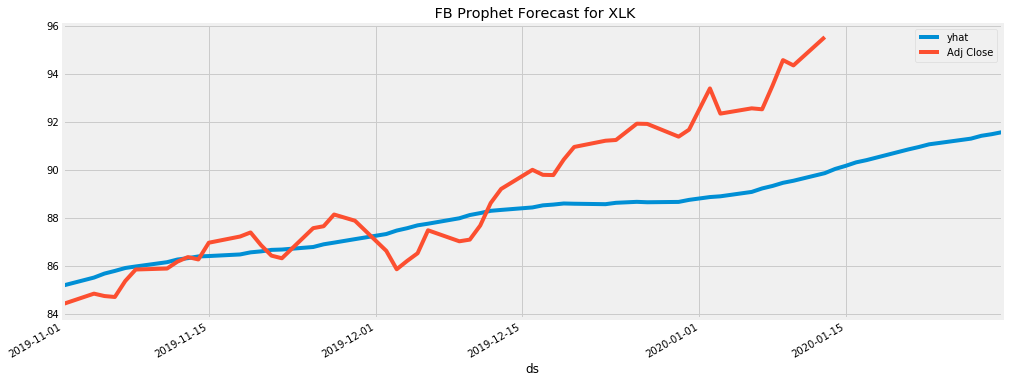

In [29]:
comb.plot(x="ds", y=["yhat", "Adj Close"], kind="line")
plt.title(' FB Prophet Forecast for XLK')
plt.savefig('xlk_fbproph_forecast.png')

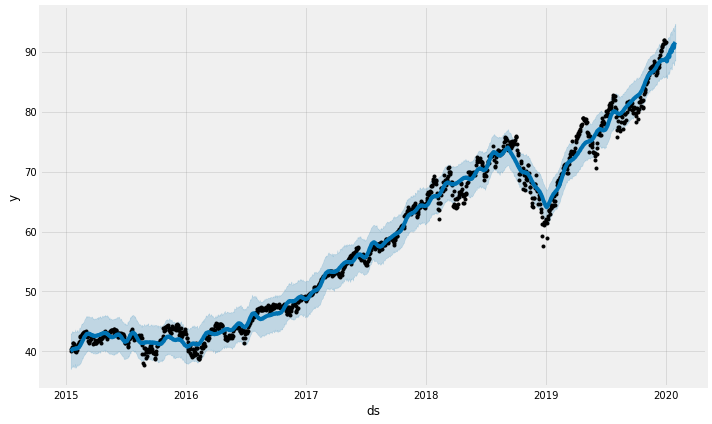

In [30]:
p.plot(df)
plt.savefig('xlk_fbp2.png')

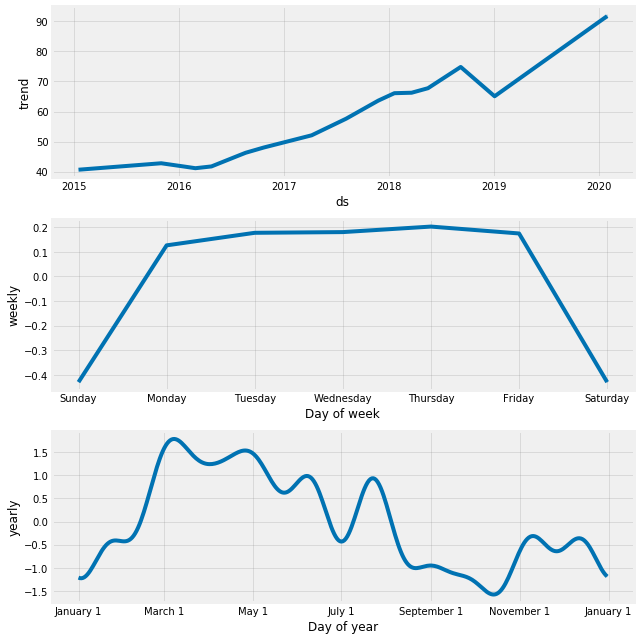

In [31]:
p.plot_components(out)
# plt.title('DIA Seasonality Trends')
plt.savefig('xlk_seasonality.png')

In [32]:
split = pd.to_datetime('2019-12-01')
true = spy.set_index('ds')[split:]
past = spy.set_index('ds')[:split].reset_index()

In [33]:
pro = proph(interval_width=.95)
pro.fit(past)
inp = pro.make_future_dataframe(periods=20, freq='D').set_index('ds')[split:].reset_index()
out = pro.predict(inp)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [34]:
pred = out[['ds', 'yhat']].set_index('ds')
pred

,yhat
ds,
2019-12-01,84.972361
2019-12-02,86.138344
2019-12-03,86.241962
2019-12-04,86.294980
2019-12-05,86.329761
2019-12-06,86.310408
2019-12-07,85.146666
2019-12-08,85.152675
2019-12-09,86.274984
